![](images/ucl_logo.png)

[[Next](WriteUp.ipynb#5.0-Project-Write-up)] [[Home](CW-1-Pearl-River-Intro.ipynb#Geog-2021-Coursework)] [[Prev](Download.ipynb#3.-Download-data)]

# 4.0 Urban Model

##4.1 Introduction

In this section, you will learn how to apply the land use change model(s) using one of two methods.

##4.2 The Models

Equations from Seto et al. have already been presented to you:

![](images/natural2urban.png)

![](images/ag2urban.png)

There are two parts in the original growth model, the first being modeling the urban land transformed from natural vegetation (“Nat-Urban model” hereafter), and the second being urban land transformed from agricultural land (“Agr-Urban model” hereafter). 

Ideally, you should calibrate and test both of these models. 

It is acceptable however to simplify this process, and calculate only thesufficient total amount of urban area gained in each time period, and a combined model: 

![](images/comp.png)

In these models, we assume that changes are driven by five factors: per capita investment, per capita agricultural output, wages in private sectors, average wages, and per unit productivity of land. The per unit productivity of land, 

![](images/eq.png)

takes into account the agricultural and urban land area from the previous time step.  This model assumes the amount of land changed into urban built area is a linear combination of these five factors, and we have collected or calculated data for these factors by now. What we don’t know yet is how much each factor contributes in the model, or, in another word, the coefficient of each factor (i.e. α, β1, β2, β3, β4 and β5). In order to build this model for the use of future prediction, we need to figure out the best value of the coefficients. This is essentially a model “inversion” problem. We can call these 'factors' parameters, in that they are the parameters (at present unknown) of a multi-linear model.

##4.3 Gathering socio-economic data

There are many freely available online database for downloading important socio-economic data. Some examples are the Center for International Earth Science Information Network (CIESIN) at Columbia University and the World Bank. The data we will be using here are from the [Guangdong Statistical Yearbook](http://www.gdstats.gov.cn/tjnj/2006/ml_e.htm).

![](images/page.png)

A spreadsheet with relevant data has been compiled and can be downloaded [here](https://github.com/profLewis/Geog2021_Coursework/blob/master/files/UrbanGrowthModel_Students.xlsx)

Note that the classification results in the spreadsheet are the lecturers' results and **must not** be used in student analyses (i.e. you must put in your own classification results).

Note that data in the spreadsheet / files is only for a limited time period (1987 to 2000). You will only be able to run the model for years that you have these driving data.


## 4.4 Applying the models

Since the data are presented in a spreadsheet, you *should* be able to use your existing (spreadsheet) skills to apply this multi-linear model. It is sufficient for you to do that (along with some form of accuracy assessment). As an alternative, we provide some codes below that might make the modelling easier.

In [79]:
# read LUC data  & socio data
book = 'https://github.com/profLewis/Geog2021_Coursework/blob/master/files/UrbanGrowthModel_Students.xlsx'

In [80]:
import xlrd
import numpy as np

# This part reads the data from the excel file
# given above as 'book'


# utility
def getfloats(sheet,c):
    return np.array([i for i in sheet.col_values(c)[1:] \
                     if type(i) == float])
# open the excel file
bookf = xlrd.open_workbook(book)
sheet = bookf.sheet_by_index(0) # Get the first sheet
# get the column headings
headings = sheet.row_values(0,end_colx=13)
# read the years from 1st col
year = getfloats(sheet,0)
# read each heading
data = {}
n = len(year)
for i,h in enumerate(headings):
    data[h] = getfloats(sheet,i)[:n]
    

In [83]:
# lets see what we have
for h in headings:
    print h

# simplify and load variables
# shorten to length n-1 because need growth
# ie difference
investment = data[headings[3]][:n-1]
population = data[headings[4]][:n-1]
private_wage = data[headings[5]][:n-1]
agr_output = data[headings[6]][:n-1]
indust_output = data[headings[7]][:n-1]
agr_pop = data[headings[8]][:n-1]
avg_wage = data[headings[9]][:n-1]


Agricultural land (km2)
Urban land (km2)
Growth (Meansured in km2)
Investment in capital construction (100 million yuan)
population (10000)
wages in non-state, non-collective units (100 million yuan)
value of gross agricultural output (100 million yuan)
value of gross inductrial output (100 million yuan)
agriculture population (100 million yuan)
average total wage (yuan)
productivity ratio
Growth (Prediction in km2)


In [94]:
%matplotlib inline

import statsmodels.api as sm
import matplotlib.pyplot as plt

agr_land = data['Agricultural land (km2)']
urban_land = data['Urban land (km2)']

growth = urban_land[1:]-urban_land[:-1]

urban_land = urban_land[:n-1]
agr_land   = agr_land[:n-1]

data_matrix = np.transpose(np.array([\
                investment/population, \
                agr_output/agr_pop, \
                np.log(private_wage), \
                np.log(avg_wage), \
                (agr_output/agr_land)/(indust_output/urban_land)\
                ]))
print growth
print urban_land

[   8.1      67.5      55.1196   61.8804   49.5      56.5497   85.7088
   59.0814  106.8732  114.7869  180.      180.      198.    ]
[  459.9      468.       535.5      590.6196   652.5      702.       758.5497
   844.2585   903.3399  1010.2131  1125.      1305.      1485.    ]


parameters for multilinear-regression 304.083443512 7399.64520929 -0.24287028644 -5.16660036642 81.3440333878 

year [ 1987.  1988.  1989.  1990.  1991.  1992.  1993.  1994.  1995.  1996.
  1997.  1998.  1999.  2000.]


data [   8.1      67.5      55.1196   61.8804   49.5      56.5497   85.7088
   59.0814  106.8732  114.7869  180.      180.      198.    ]


model [  -0.31233603   58.05614192   64.12996689   77.49507788   49.18273195
   65.66979904   82.87699534   89.22136062   98.86577032  108.52839189
  136.66253367  181.00124616  211.84179703]


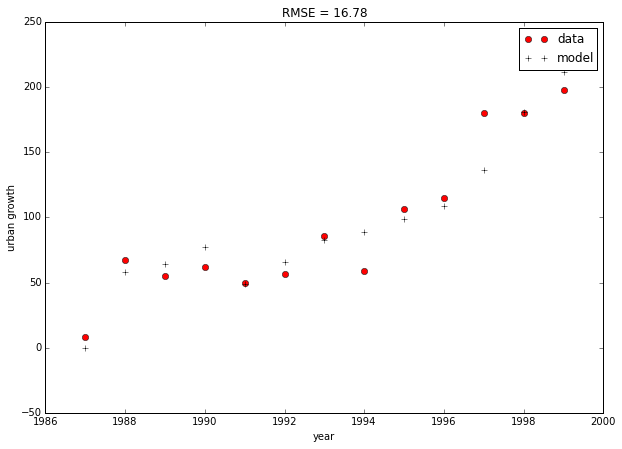

In [98]:
# regress growth as function of terms in
# data matrix
pp = np.linalg.lstsq(data_matrix, growth)
print 'parameters for multilinear-regression',
for i in pp[0]:
    print i,

RMSE = np.sqrt(pp[1]/float(len(growth)))

plt.figure(figsize=(10,7))
plt.title('RMSE = %.2f'%RMSE)
fwd = np.sum(pp[0]*data_matrix, axis=1)
plt.plot(year[:-1], growth,'ro',label='data')
plt.plot(year[:-1], fwd,'k+',label='model')
plt.xlabel('year')
plt.ylabel('urban growth')
plt.legend(loc='best')

print '\n\nyear',year
print '\n\ndata',growth
print '\n\nmodel',fwd



The material above provides all of the computer code you would need to apply the different models. All you would need to change (if you felt confident enough) would be the terms that are stacked up in `data_matrix` and any different matric of `growth` (e.g. `natural -> urban`). It is not a requirement that you develop any further models, and it is sufficient if you run only the single model above.

You **must** put in your own data from the classification result however (and this information must be traceable from your `Results`).

You should make some attempt to assess the accuracy of any model that you build. This is perhaps most readily achieved by some form of cross-validation (leave one sample out and test how well it is modelled).

You must explain and reference the models that you use (in a `Theory` section of simply a `Models` section) and claerly and traceably present all results (in `Model Results` section/sub-section). You must explain the approach taken for your accuracy assessment and present the results.

A discussion of the results (from the classification and modelling) must be in a `Discussion` section of the report. You should make sure to discuss the uncertainty in the classification(s) and the modelling. Comment on what the expected 'reliability' of such a model might be in this context.

A sufficient (i.e. pass) mark for the relevant section will be awarded if you correctly (assuming the classification results you have obtained are 'true') complete the model calibration (using the code above or excel or any other tool you are familiar with, provided you show your working), show all relevant results and properly plot the modelling results (as above). You will need to include more than a token effort at uncertainty estimation.

## 4.5 Further Work

Once you have achieved this minimum, there is plenty of scope for additional marks, e.g. 

* calibrating/testing the alternative models above
* extending the driver (socio-economic) dataset (if you can find suitable datasets) so you can run and test the model over a longer time period (this may not be possible -- I haven't fully explored it yet)
* Examine 'simpler' models, e.g. try taking out some of the factors in the model(s) above and see how good the results are then. Note that if you use fewer factors, you will have reduced the degrees of freedom of the model, and can then calculate some form of 'information criterion' such as [the AIC](http://en.wikipedia.org/wiki/Akaike_information_criterion)
* Trying to incorporate uncertainty in the growth data into the analysis
* etc.

If you are worried that a particular aspect you are thinking of following as an 'extra' might not be useful, ask the course tutor.

[[Next](WriteUp.ipynb#5.0-Project-Write-up)] [[Home](CW-1-Pearl-River-Intro.ipynb#Geog-2021-Coursework)] [[Top](#4.0-Urban-Model)] [[Prev](Download.ipynb#3.-Download-data)]